In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


Step 3: Load and Inspect the Dataset

We'll use a sample dataset that might contain columns like Sales, Advertising Spend, Discounts, Product Type, and Date.

In [8]:
# Load the dataset
data = pd.read_csv('advertising.csv')  

# Display the first few rows of the dataset
data.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Step 4: Data Preprocessing

Before we build the model, we need to preprocess the data. This step involves:

Handling missing values

Feature encoding (if necessary)

Scaling numerical features

Creating time-based features from the date (e.g., day of the week, month)

Handling Missing Values:

In [9]:
# Check for missing values
data.isnull().sum()

# Fill missing values (e.g., fill with the mean or median for numerical features)
data.fillna(data.mean(), inplace=True)


Feature Encoding (if applicable):

If your dataset contains categorical variables (e.g., Product_Type), you'll need to encode them as numerical values.

In [10]:
# One-hot encoding for categorical variables
data = pd.get_dummies(data, drop_first=True)


Scaling Numerical Features:

Sometimes, it is beneficial to scale numerical features (like advertising spend) to bring all features to the same scale, especially when using models like Linear Regression or SVM.

In [12]:
scaler = StandardScaler()
data[['TV', 'Radio', 'Newspaper','Sales']] = scaler.fit_transform(
    data[['TV', 'Radio', 'Newspaper','Sales']])


In [14]:
# Define features and target
features = ['TV', 'Radio', 'Newspaper','Sales']
target = 'Sales'

X = data[features]
y = data[target]

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}, R²: {r2_lr:.2f}")


Linear Regression - MAE: 0.00, RMSE: 0.00, R²: 1.00


In [16]:
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, R²: {r2_rf:.2f}")


Random Forest - MAE: 0.03, RMSE: 0.05, R²: 1.00


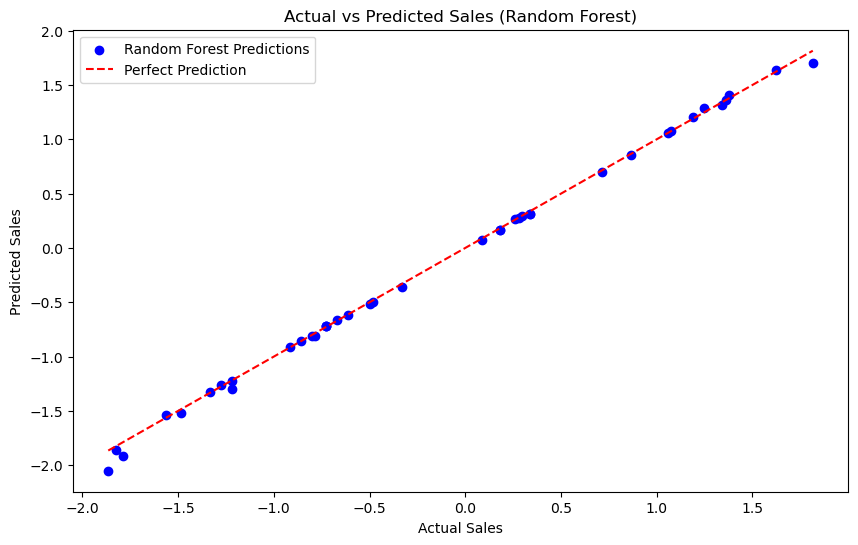

In [17]:
# Plot predicted vs actual sales for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', label='Random Forest Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Random Forest)')
plt.legend()
plt.show()


In [18]:
# Get feature importance from the Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


     Feature  Importance
3      Sales    0.992785
0         TV    0.004021
2  Newspaper    0.001720
1      Radio    0.001474
